<a href="https://colab.research.google.com/github/Yuzerzef/Banknote-prediction-using-Decision_tree/blob/main/Banknote%20prediction%20using%20Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

|Attribute Information      |    Attribute name| data ype|
|---|---|---|
|variance of Wavelet Transformed image | variance_wti|  float64|
|skewness of Wavelet Transformed image | skewness_wti| float64|
|curtosis of Wavelet Transformed image| curtosis_wti| float64|
| entropy of image            |         entropy_image|  float64|
|class                        |        class|  int64|

In [ ]:
df=pd.read_csv("/content/banknote.csv" )
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
df.columns =(['variance_wti', 'skewness_wti', 'curtosis_wti', 'entropy_image', 'class'])
df.head()


,variance_wti,skewness_wti,curtosis_wti,entropy_image,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0



#The data type of the attributes
1. variance_wti is      float64
2. skewness_wti  is    float64
3.  curtosis_wti  is    float64
4.  entropy_image  is   float64
5. class           is    int64 

No null or missing value is observed. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   variance_wti   1371 non-null   float64
 1   skewness_wti   1371 non-null   float64
 2   curtosis_wti   1371 non-null   float64
 3   entropy_image  1371 non-null   float64
 4   class          1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.dtypes

variance_wti     float64
skewness_wti     float64
curtosis_wti     float64
entropy_image    float64
class              int64
dtype: object

In [ ]:
df.isnull().sum()

variance_wti     0
skewness_wti     0
curtosis_wti     0
entropy_image    0
class            0
dtype: int64

In [ ]:
df.shape

(1371, 5)

In [ ]:
df.describe()

,variance_wti,skewness_wti,curtosis_wti,entropy_image,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#the observed correlations between the features and label.

1. there is strong negetive correlation (-0.79) between the class and variance of Wavelet Transformed image.

2. strong negetive correlation (-0.79) between the skewness of Wavelet Transformed image and curtosis of Wavelet Transformed image.

3. high negative correlation (-0.53) between entropy of image and skewness of Wavelet Transformed image.

###it seems that all the features of the dataset are important for the class prediction whather a banknote is authentic or not. so we will need use all the feature of the dataset.

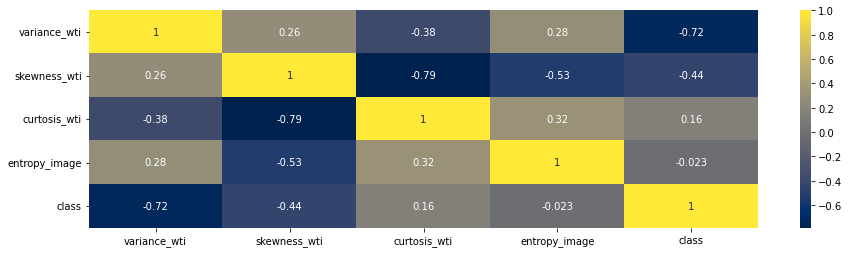

In [ ]:
plt.figure(figsize = (15,4))
sns.heatmap(df.corr()  ,annot = True , cmap="cividis")

#the  class label of the dataset is balanced since IR= 761/610 = 1.247
this means 55.51% the of class label belongs to class 0 where the other 44.49% belongs to class 1.

the below figure shows clearly the balanceness of the dataset.


In [ ]:
df['class'].value_counts()

0    761
1    610
Name: class, dtype: int64

Text(0.5, 1.0, 'authentic VS Not authentic')

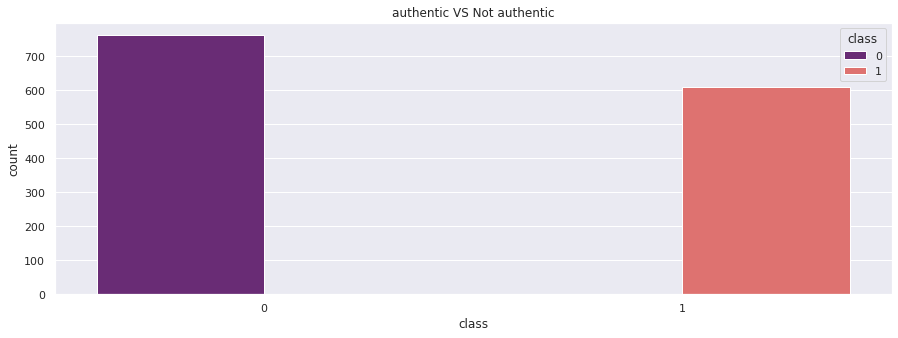

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.countplot(x='class',hue='class', data=df,  palette="magma")
plt.title ('authentic VS Not authentic')

Text(0.5, 1.0, 'Class distribution')

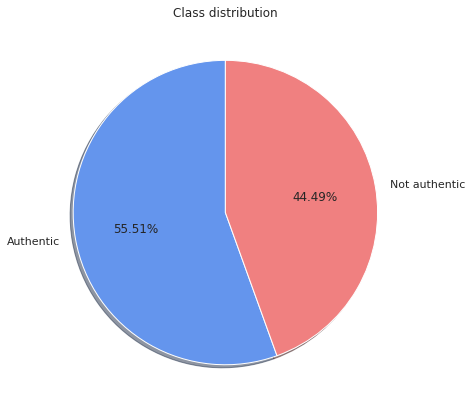

In [ ]:
plt.figure(figsize=(15,7))
plt.pie(df['class'].value_counts(), labels=['Authentic', 'Not authentic'] , autopct='%.2f%%' , shadow=True, startangle=90, 
     colors=['cornflowerblue', 'lightcoral']  )
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.title("Class distribution")

In [ ]:
X= df.drop(["class"], axis=1)
y=pd.DataFrame(df["class"])

In [ ]:
X.head()

,variance_wti,skewness_wti,curtosis_wti,entropy_image
0,4.54590,8.1674,-2.4586,-1.46210
1,3.86600,-2.6383,1.9242,0.10645
2,3.45660,9.5228,-4.0112,-3.59440
3,0.32924,-4.4552,4.5718,-0.98880
4,4.36840,9.6718,-3.9606,-3.16250


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


# Train_test_split




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1096, 4) (1096, 1)
Test set: (275, 4) (275, 1)


# Model developing 

In [ ]:
dtree=DecisionTreeClassifier(random_state=0,criterion='entropy').fit(X_train,y_train)

In [ ]:
predict=dtree.predict(X_test) 

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       148
           1       0.99      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
! pip install -q scikit-plot

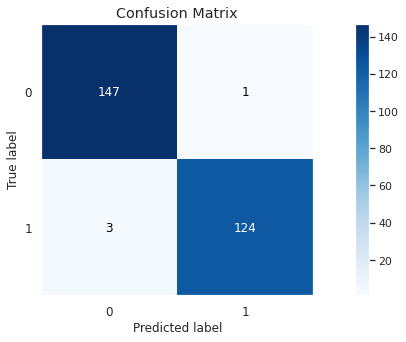

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
   predict,
    figsize=(15,5))

In [ ]:
d_tree=DecisionTreeClassifier(random_state=0,criterion='entropy' , splitter='best').fit(X_train,y_train)

In [ ]:
y_predict=dtree.predict(X_test) 

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       148
           1       0.99      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



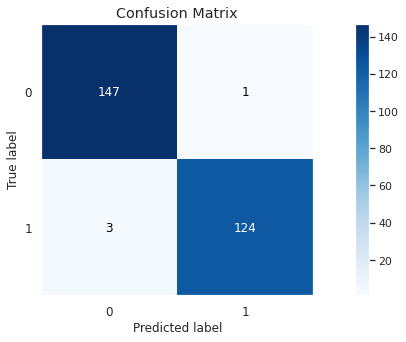

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
   y_predict,
    figsize=(15,5))

[Text(194.81896551724137, 201.90857142857143, 'X[0] <= 0.32\nentropy = 0.99\nsamples = 1096\nvalue = [613, 483]'),
 Text(118.33448275862068, 170.84571428571428, 'X[1] <= 5.865\nentropy = 0.711\nsamples = 529\nvalue = [103, 426]'),
 Text(63.49655172413793, 139.78285714285715, 'X[2] <= 6.219\nentropy = 0.316\nsamples = 420\nvalue = [24, 396]'),
 Text(23.089655172413792, 108.72, 'X[1] <= 4.085\nentropy = 0.033\nsamples = 291\nvalue = [1, 290]'),
 Text(11.544827586206896, 77.65714285714284, 'entropy = 0.0\nsamples = 281\nvalue = [0, 281]'),
 Text(34.63448275862069, 77.65714285714284, 'X[3] <= -2.168\nentropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(23.089655172413792, 46.59428571428572, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(46.179310344827584, 46.59428571428572, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(103.90344827586206, 108.72, 'X[1] <= -4.675\nentropy = 0.676\nsamples = 129\nvalue = [23, 106]'),
 Text(80.81379310344828, 77.65714285714284, 'X[0] <= -0.357

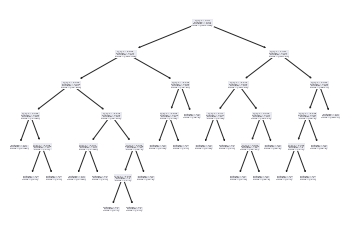

In [ ]:
from sklearn import tree
tree.plot_tree(dtree)